# ***dom-juan anlaysi***

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from warnings import filterwarnings

filterwarnings('ignore')


In [29]:
data = pd.read_csv('/kaggle/input/dom-juan-replics/dom_juan_dataset.csv')

In [30]:
print(data.head())


   personnage                                           replique
0      GUSMAN  Et la raison encore ? Dis-moi, je te prie, Sga...
1  SGANARELLE  Gager : Signifie aussi, Parier ; faire\nune ga...
2      GUSMAN  Feu : Se dit figurément en chose\nspirituelles...
3  SGANARELLE  Non, c'est qu'il est jeune encore, et qu'il n'...
4      GUSMAN  Un homme de sa qualité ferait une action si lâ...


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   personnage  520 non-null    object
 1   replique    520 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB
None


In [32]:
data.dropna(inplace=True)

In [33]:
data['length'] = data['replique'].apply(len)

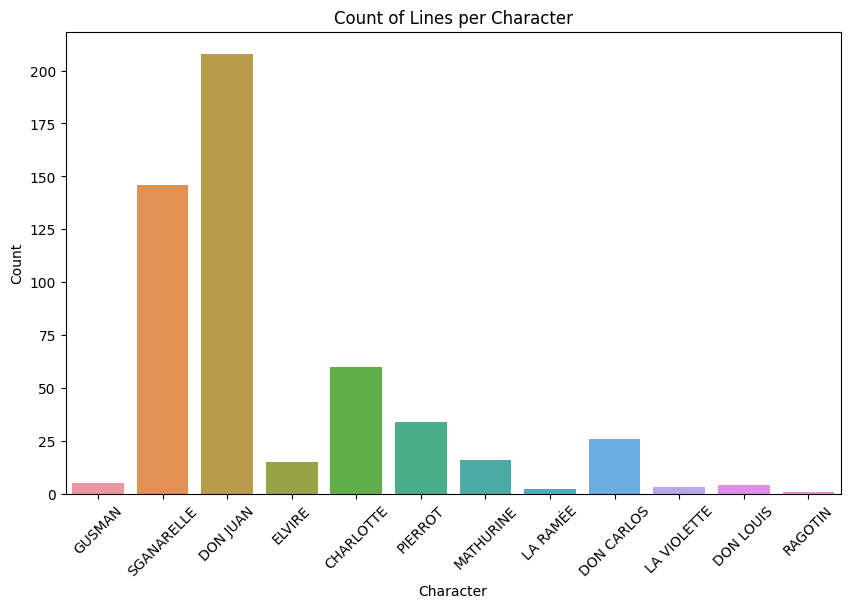

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='personnage')
plt.title('Count of Lines per Character')
plt.xlabel('Character')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

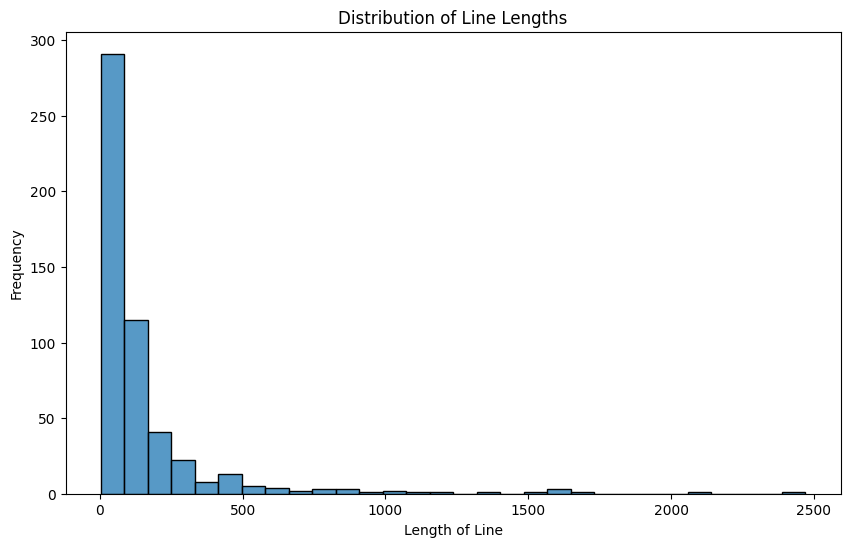

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data['length'], bins=30)
plt.title('Distribution of Line Lengths')
plt.xlabel('Length of Line')
plt.ylabel('Frequency')
plt.show()

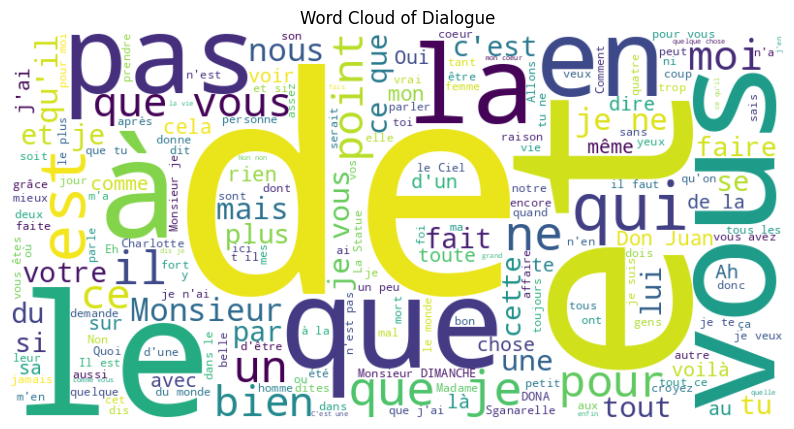

In [ ]:
# Generate a word cloud from the dialogue
text = ' '.join(data['replique'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Dialogue')
plt.show()

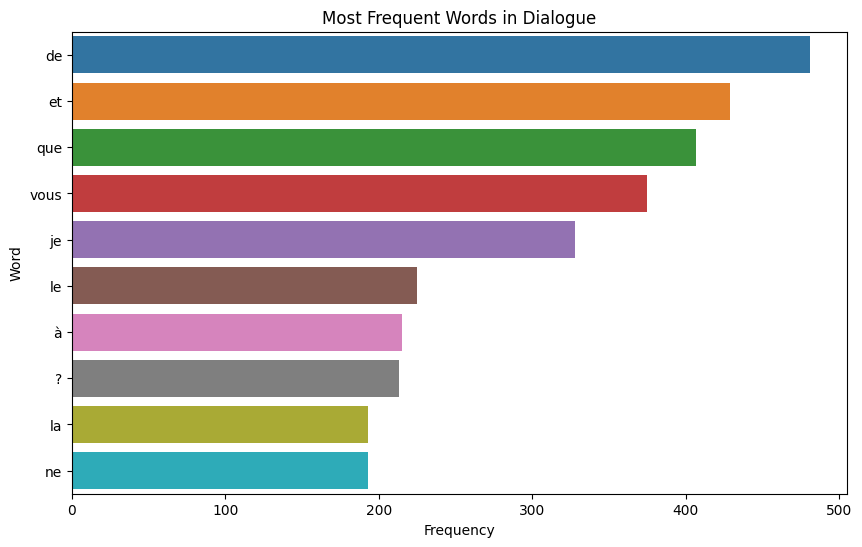

In [38]:
# Plot the most frequent words in the dialogue
from collections import Counter

words = text.split()
most_common_words = Counter(words).most_common(10)
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=words_df)
plt.title('Most Frequent Words in Dialogue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

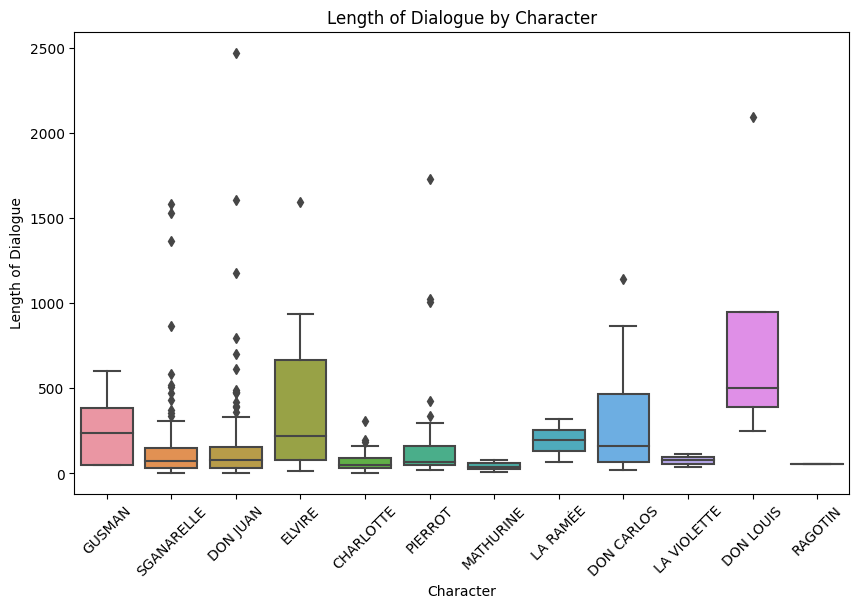

In [39]:
# Boxplot of dialogue length by character
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='personnage', y='length')
plt.title('Length of Dialogue by Character')
plt.xlabel('Character')
plt.ylabel('Length of Dialogue')
plt.xticks(rotation=45)
plt.show()

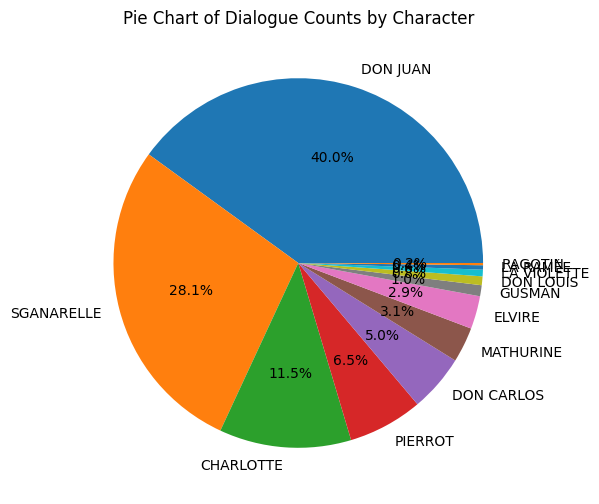

In [40]:
# Pie chart of dialogue counts per character
plt.figure(figsize=(10, 6))
data['personnage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Dialogue Counts by Character')
plt.ylabel('')
plt.show()

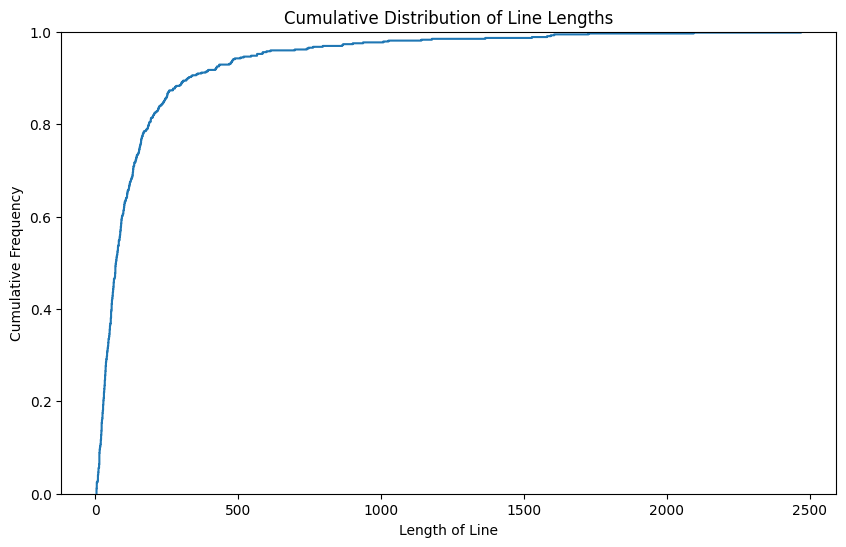

In [41]:
# Cumulative distribution of line lengths
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['length'])
plt.title('Cumulative Distribution of Line Lengths')
plt.xlabel('Length of Line')
plt.ylabel('Cumulative Frequency')
plt.show()

In [42]:
label_encoder = LabelEncoder()
data['personnage_encoded'] = label_encoder.fit_transform(data['personnage'])

In [44]:
X = data[['personnage_encoded', 'length']]  # Features
y = data['personnage']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0 31]]


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   CHARLOTTE       1.00      1.00      1.00        13
  DON CARLOS       1.00      1.00      1.00         4
    DON JUAN       1.00      1.00      1.00        37
   DON LOUIS       1.00      1.00      1.00         2
      ELVIRE       1.00      1.00      1.00         6
      GUSMAN       1.00      1.00      1.00         3
   MATHURINE       1.00      1.00      1.00         2
     PIERROT       1.00      1.00      1.00         6
  SGANARELLE       1.00      1.00      1.00        31

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



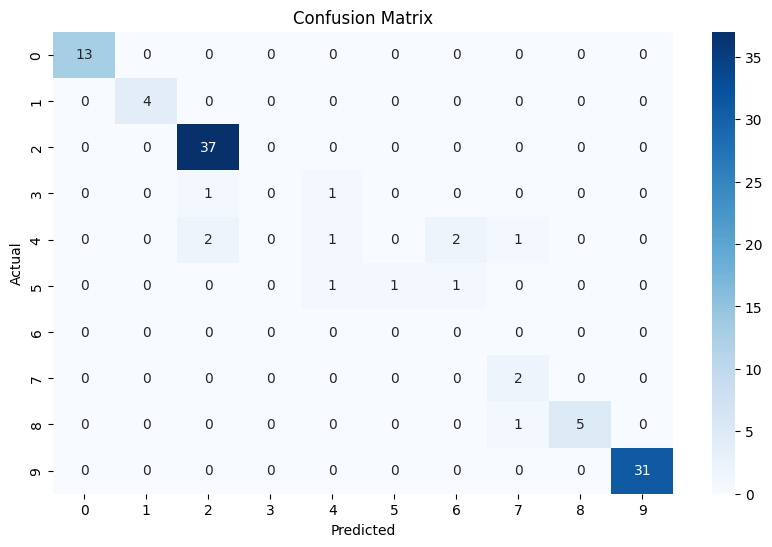

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0]
 [ 0  0  2  0  1  0  2  1  0  0]
 [ 0  0  0  0  1  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  1  5  0]
 [ 0  0  0  0  0  0  0  0  0 31]]


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   CHARLOTTE       1.00      1.00      1.00        13
  DON CARLOS       1.00      1.00      1.00         4
    DON JUAN       0.93      1.00      0.96        37
   DON LOUIS       0.00      0.00      0.00         2
      ELVIRE       0.33      0.17      0.22         6
      GUSMAN       1.00      0.33      0.50         3
    LA RAMÉE       0.00      0.00      0.00         0
   MATHURINE       0.50      1.00      0.67         2
     PIERROT       1.00      0.83      0.91         6
  SGANARELLE       1.00      1.00      1.00        31

    accuracy                           0.90       104
   macro avg       0.68      0.63      0.63       104
weighted avg       0.91      0.90      0.90       104



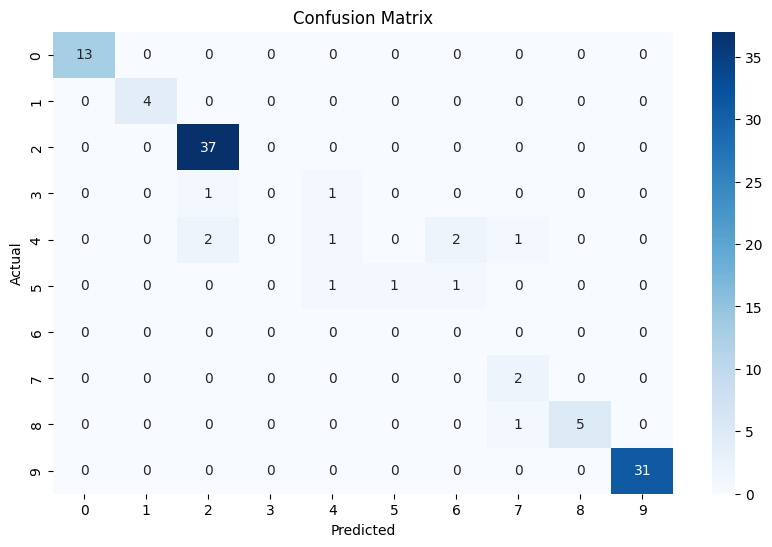

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0  0 13  0  0  0  0  0  0]
 [ 0  2  2  0  0  0  0  0  0]
 [ 0  1 35  0  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  6]
 [ 0  0  2  0  0  0  0  0 29]]


In [63]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   CHARLOTTE       0.00      0.00      0.00        13
  DON CARLOS       0.67      0.50      0.57         4
    DON JUAN       0.56      0.95      0.71        37
   DON LOUIS       0.00      0.00      0.00         2
      ELVIRE       0.00      0.00      0.00         6
      GUSMAN       0.00      0.00      0.00         3
   MATHURINE       0.00      0.00      0.00         2
     PIERROT       0.00      0.00      0.00         6
  SGANARELLE       0.76      0.94      0.84        31

    accuracy                           0.63       104
   macro avg       0.22      0.26      0.24       104
weighted avg       0.45      0.63      0.52       104



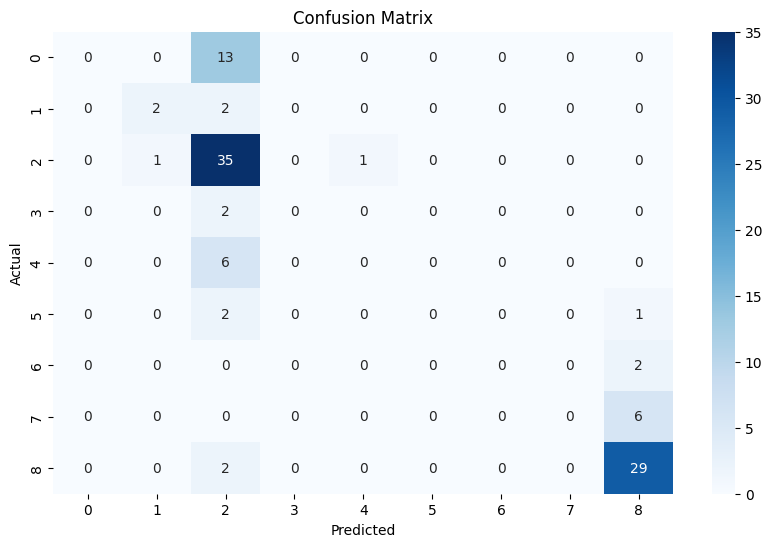

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()